<img src="./images/DLI_Header.png" style="width: 400px;">

# Image Classification of an American Sign Language Dataset

In this section, you will perform the data preparation, model creation, and model training steps you observed in the last section using a different dataset: images of hands making letters in [American Sign Language](http://www.asl.gs/).

## Objectives

By the time you complete this section you will be able to:
* Prepare image data for training
* Create and compile a simple model for image classification
* Train an image classification model and observe the results

## American Sign Language Dataset

The [American Sign Language alphabet](http://www.asl.gs/) contains 26 letters. Two of those letters (j and z) require movement, so they are not included in the training dataset.  

<img src="./images/asl.png" style="width: 600px;">

### Kaggle

This dataset is available from the website [Kaggle](http://www.kaggle.com), which is a fantastic place to find datasets and other deep learning resources. In addition to providing many fantastic resources like datasets and "kernels" that are like these notebooks, Kaggle hosts competitions that you can take part in, competing with others in training highly accurate models.

If you're looking to practice or see examples of many deep learning projects, Kaggle is a great site to visit.

## Loading the Data

We are going to walk you through loading the ASL dataset since it is not available via Keras in the same way that MNIST was. By the end of this section we will have `x_train`, `y_train`, `x_test`, and `y_test` variables familiar to you from the last section.

### Reading in the Data

The sign language dataset is in [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) (Comma Separated Values) format. You may be familiar with CSV if you've worked with spreadsheets before. Essentially it is just a grid of rows and columns with labels at the top. 

To load and work with the data, we'll be using a library called [Pandas](https://pandas.pydata.org/), which is a highly performant tool for loading and manipulating data. We'll read the CSV files into a format called a Pandas Dataframe, which is how Pandas stores grids of data.

In [1]:
import pandas as pd

Pandas has a `read_csv` method that expects a file to a csv file, and returns a dataframe:

In [2]:
train_df = pd.read_csv("asl_data/sign_mnist_train.csv")
test_df = pd.read_csv("asl_data/sign_mnist_test.csv")

### Exploring the Data

Let's take a look at our data. We can use the [`head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method to print the first few rows of the dataframe. As you can see, each row is an image which has a `label` column, and also, 784 values representing each pixel value in the image, just like with the MNIST dataset. Note that the labels currently are numerical values, not letters of the alphabet:

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Extracting the Labels

As with MNIST, we would like to store our training and testing labels in `y_train` and `y_test` variables. Here we create those variables and then delete the labels from our original dataframes, where they are no longer needed:

In [4]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

### Extracting the Images

As with MNIST, we would like to store our training and testing images in `x_train` and `x_test` variables. Here we create those variables:

In [5]:
x_train = train_df.values
x_test = test_df.values

### Summarizing the Training and Testing Data

As you can see we now have 27,455 images with 784 pixels each for training...

In [6]:
x_train.shape

(27455, 784)

...as well as their corresponding labels:

In [7]:
y_train.shape

(27455,)

For testing, we have 7,172 images...

In [8]:
x_test.shape

(7172, 784)

...and their corresponding labels:

In [9]:
y_test.shape

(7172,)

## Visualizing the Data

To visualize the images we will again use the matplotlib library. You don't need to worry about the details of this visualization, but if you wish can learn more about [matplotlib](https://matplotlib.org/) at a later time. Note that we'll have to reshape the data from its current 1D shape of 784 pixels, to a 2D shape of 28x28 pixels to make sense of the image:

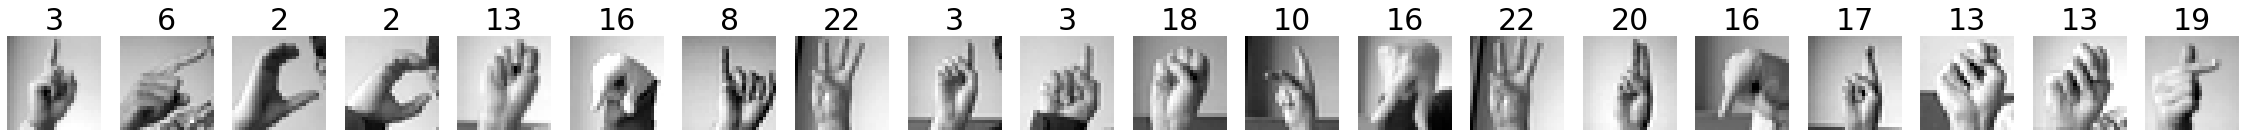

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

## Exercise: Normalize the Image Data

As we did with the MNIST dataset, we are going to normalize the image data, meaning that their pixel values, instead of being between 0 and 255 as they are currently:

In [11]:
x_train.min()

0

In [12]:
x_train.max()

255

...should be floating point values between 0 and 1. Use the following cell to work. If you get stuck, look at the solution below.

In [13]:
# TODO: Normalize x_train and x_test.
x_train = x_train / 255
x_test = x_test / 255 

### Solution

Click on the '...' below to show the solution.

```python
x_train = x_train / 255
x_test = x_test / 255
```

## Exercise: Categorize the Labels

As we did with the MNIST dataset, we are going to categorically encode the labels. Recall that you can use the `keras.utils.to_categorical` method to accomplish this by passing it the values you wish to encode, and, the number of categories you would like to encode it into. Do your work in the cell below. We have imported `keras` and set the number of categories (25) for you.

In [14]:
import tensorflow.keras as keras
num_classes = 25

In [15]:
# TODO: Categorically encode y_train and y_test.


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Solution

Click on the '...' below to show the solution.

```python
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
```

## Exercise: Build the Model

The data is all prepared, you have normalized images for training and testing, as well as categorically encoded labels for training and testing.

For this exercise you are going to build a sequential model. Just like last time build a model that:
* Has a dense input layer. This layer should contain 512 neurons, use the `relu` activation function, and expect input images with a shape of `(784,)`
* Has a second dense layer with 512 neurons which uses the `relu` activation function
* Has a dense output layer with neurons equal to the number of classes, using the `softmax` activation function

Do your work in the cell below, creating a `model` variable to store the model you build. We've imported the Keras `Sequental` model class and `Dense` layer class to get you started. Reveal the solution below if you get stuck:

In [16]:
y_train[0:9]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# TODO: build a model following the guidelines above.
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

### Solution

Click on the '...' below to show the solution.

```python
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))
```

## Summarizing the Model

Run the cell below to summarize the model you just created:

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 25)                12825     
Total params: 677,401
Trainable params: 677,401
Non-trainable params: 0
_________________________________________________________________


## Compiling the Model

We'll compile our model with the same options as before, using [categorical crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) to reflect the fact that we want to fit into one of many categories, and measuring the accuracy of our model:

In [21]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Exercise: Train the Model

Use your model's `fit` method to train it for 20 epochs using the training and testing images and labels you've created:

In [22]:
# TODO: Train the model for 20 epochs.
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/20
858/858 [==============================] - 2s 3ms/step - loss: 1.9398 - accuracy: 0.3856 - val_loss: 1.7332 - val_accuracy: 0.4552
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 0.9490 - accuracy: 0.6786 - val_loss: 1.0321 - val_accuracy: 0.6576
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 0.5872 - accuracy: 0.8051 - val_loss: 1.0113 - val_accuracy: 0.6838
Epoch 4/20
858/858 [==============================] - 2s 3ms/step - loss: 0.3958 - accuracy: 0.8733 - val_loss: 0.8052 - val_accuracy: 0.7794
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 0.2992 - accuracy: 0.9125 - val_loss: 1.0413 - val_accuracy: 0.7617
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 0.2351 - accuracy: 0.9322 - val_loss: 0.8183 - val_accuracy: 0.8282
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 0.2227 - accuracy: 0.9439 - val_loss: 1.7318 - val_accuracy: 0.6880
Epoch 

### Solution

Click on the '...' below to show the solution.

```python
model.fit(x_train, y_train,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))
```

## Discussion: What happened?

We can see that the training accuracy got to a fairly high level, but the validation accuracy was not as high. What do you think happened here?

Think about it for a bit before clicking on the '...' below to reveal the answer.

This is an example of the model learning to categorize the training data, but performing poorly against new data that it has not been trained on. Essentially, it is memorizing the dataset, but not gaining a robust and general understanding of the problem. This is a common issue called *overfitting*. We will discuss overfitting in the next two lectures, as well as some ways to address it.

## Summary

In this section you built your own neural network to perform image classification, and while there is room for improvement, which we will get to shortly, you did quite well. Congrats!

At this point you should be getting somewhat familiar with the process of loading data (incuding labels), preparing it, creating a model, and then training the model with your prepared data.

### Clear the Memory
Before moving on, please execute the following cell to clear up the GPU memory. This is required to move on to the next notebook.

In [23]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Next

Now that you have built some very basic, somewhat effective models, you will begin to learn about more sophisticated models, including *Convolutional Neural Networks*.

Please continue to the next section: [*ASL with CNNs*](./03_asl_cnn.ipynb).